In [8]:
import pickle
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline

In [3]:
def wrangle(filename):
  #loading our data which is in .arff format
  raw_data = loadarff(filename)
  # loading it as a df for manipulating 
  df = pd.DataFrame(raw_data[0])
  # change our target dtype for string manipulation
  df["class"]=df["class"].astype(str)
  # extracting only "0" and "1" form our class column using str.split
  df["bankrupt"]= df['class'].str.split("'",expand=True)[1]
  # droping the old class column
  df=df.drop(columns="class")
  return df



In [6]:
df = wrangle("/content/drive/MyDrive/bankrucy/1year.arff")
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [7]:

#check if thair is any missing data
nans_by_col= df.isnull().sum()
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head(10)

nans_by_col shape: (65,)


Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
Attr6      3
Attr7      3
Attr8     25
Attr9      1
Attr10     3
dtype: int64

#checking if thair is any imbalacing in my data

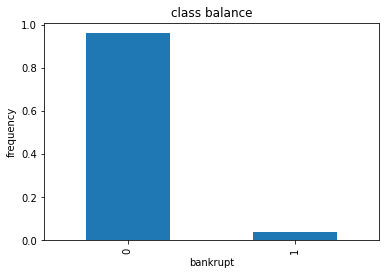

In [18]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",xlabel='bankrupt',ylabel='frequency',title='class balance'
); 

#Spliting
Create your feature matrix X and target vector y. Your target is "bankrupt"

In [24]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7027, 64)
y shape: (7027,)


#Train_Test_Split
Divide your dataset into training and test sets using a randomized split. Your test set should be 20% of your data. Be sure to set random_state to 42

In [25]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5621, 64)
y_train shape: (5621,)
X_test shape: (1406, 64)
y_test shape: (1406,)


#resampling
as we can see in class distribution the class "0" represented almost 95% of our data which means if we train using this data the model is goning to skiew on it's prediction so we have to resample it .
we have 2 sampling technique :
      

1. - under sampling  

2. - over sampling

in this case we are going to use over sampling 

In [26]:
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10824, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.434180,0.34879,0.463570,2.4162,10.44900,0.0,0.434180,1.86700,2.6044,0.65121,...,5100.500,0.179320,0.66673,0.83353,0.03186,6.7801,7.8937,45.876,7.9562,12.4560
1,0.127580,0.80712,0.183790,1.2283,-25.15300,0.0,0.158370,0.23898,3.2651,0.19288,...,905.810,0.051736,0.66146,0.95154,0.00000,8.2532,5.8869,89.981,4.0564,289.4800
2,0.380870,0.61862,-0.005261,0.9915,-17.54900,0.0,0.469480,0.61649,1.8825,0.38138,...,-53.019,0.241690,0.99867,0.75269,0.00000,31.3270,7.5319,119.950,3.0430,4.8689
3,0.057545,0.50707,0.200890,1.7841,-0.43288,0.0,0.073646,0.97211,1.4059,0.49293,...,4846.300,0.069942,0.11674,0.94783,0.50861,7.8747,5.9519,66.516,5.4874,2.5895
4,0.522840,0.45499,0.439080,2.3814,276.14000,0.0,0.522840,1.19780,2.5801,0.54501,...,775.530,0.310300,0.95933,0.69848,0.25162,150.8800,3.6793,44.967,8.1171,10.6150


# Build Model(Baseline_Model)
first we have to construct our baseline model which is used for thresholding .basically the accuracy of the model we have to build must be greater than baseline accuracy.

In [27]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9628


# Constracting our actual model 
using make_pipline from scikit_learn we can create model architecture easily.

In [28]:
clf = make_pipeline(SimpleImputer(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [29]:
# using cross validation for spliting our traing data in to 5 samples we might get some good accuracy than normal train test split
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)


[0.99953811 0.99769053 1.         0.99861432 0.99953789]


# Hayperparameter tunning
we did get nice result using cross_val method but in real world we often use hyperparameter tunning to increase our accuracy

In [30]:
#specifying parameters to tune
params = {
    "simpleimputer__strategy":["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [31]:
# using grid search we can get the best parameter from the above range of params
model = GridSearchCV(
clf,param_grid=params,n_jobs=-1,cv=5,verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [32]:
#now fitting our model on oversampled data
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [33]:
#extracting the results and converting in to df just ot see it clearly
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.203638,0.030220,0.028073,0.001034,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.993995,0.986143,0.991686,0.988915,0.993530,0.990854,0.002956,21
1,1.312837,0.057980,0.029908,0.001940,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.990762,0.988915,0.987529,0.989376,0.991220,0.989560,0.001325,24
2,2.278038,0.026651,0.042034,0.002350,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.992610,0.992610,0.990762,0.992148,0.994455,0.992517,0.001182,20
3,2.372835,0.027748,0.041159,0.000792,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.988915,0.990300,0.991224,0.989838,0.991220,0.990299,0.000876,23
4,3.321125,0.060356,0.055224,0.002705,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.992610,0.992610,0.991686,0.992610,0.995379,0.992979,0.001252,19
5,3.446590,0.059809,0.054491,0.001582,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.989838,0.991686,0.990762,0.991224,0.990296,0.990761,0.000654,22
6,1.304386,0.046537,0.029695,0.001288,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999076,0.996767,0.998614,0.998614,0.999076,0.998429,0.000857,18
7,1.399635,0.022011,0.028876,0.000623,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999076,0.997691,0.999076,0.997229,0.999538,0.998522,0.000896,17
8,2.507833,0.013200,0.043840,0.001038,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999076,0.996767,0.999076,0.998614,0.999538,0.998614,0.000969,16
9,2.592053,0.055344,0.043524,0.001024,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999538,0.997229,0.999076,0.998152,0.999538,0.998707,0.000896,13


In [34]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'median'}

#evaluation 

In [35]:
acc_train = model.score(X_train_over,y_train_over)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9637


test acc 0.9637 > my baseline accuracy so this model is good

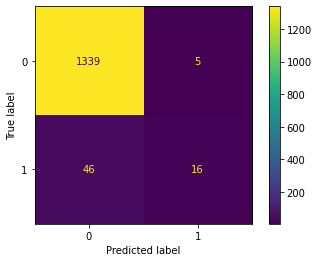

In [36]:
#plot a confusion matrix that shows how your best model performs on your test set.
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

#Important Feature 
important feature that our model used for traing 


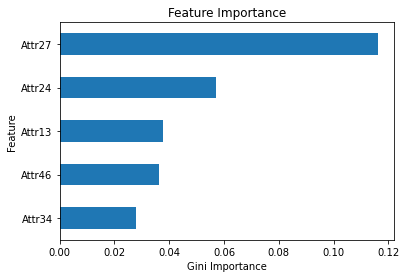

In [37]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

so this model thinks "attr_27","att_24" is the most important features in this dataset.

In [39]:
#saving model to a file
with open("model.1.pkl","wb") as f:
  pickle.dump(model,f)